### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [2]:
print(digits.data.shape)
X = digits.data
y = digits.target

(1797, 64)


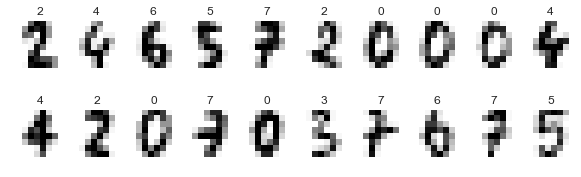

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

fig, axes = plt.subplots(2, 10, figsize=(10, 3))
for ax in axes.ravel():
    i = np.random.randint(0, digits.data.shape[0], 1)[0]
    ax.imshow(X[i].reshape(8, 8))
    ax.axis('off')
    ax.set_title(y[i])

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

gbc = GradientBoostingClassifier(
        loss='deviance',
        learning_rate=0.05,
        n_estimators=100
)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy of test set = {accuracy_score(y_test, y_pred):.3f}")

Accuracy of test set = 0.962


In [14]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, cv=5, error_score=0, n_jobs=-1)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    print(f"Average time to fit (s): {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Average time to score (s): {grid.cv_results_['mean_score_time'].mean():.3f}")

In [18]:
from sklearn.pipeline import Pipeline

gbc = GradientBoostingClassifier()

pipeline = Pipeline([
    ('gbc', gbc)
])
params = {
    'gbc__n_estimators': [10, 20, 50, 100],
    'gbc__loss': ['deviance'],
    'gbc__learning_rate': [0.01, 0.05, 0.1, 0.5],
}
get_best_model_and_accuracy(pipeline, params, X, y)

Best accuracy: 0.9243183082915971
Best params: {'gbc__learning_rate': 0.1, 'gbc__loss': 'deviance', 'gbc__n_estimators': 100}
Average time to fit (s): 3.576
Average time to score (s): 0.005
